In [6]:
import statsmodels.formula.api as smf 
import scipy.integrate as integrate
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib
import scipy

In [49]:
n_samples = 100
y = np.stack([np.random.normal(scale=np.arange(1,n_samples)) 
          for x in range(15)]).std(axis=0)
x = np.arange(1,n_samples)

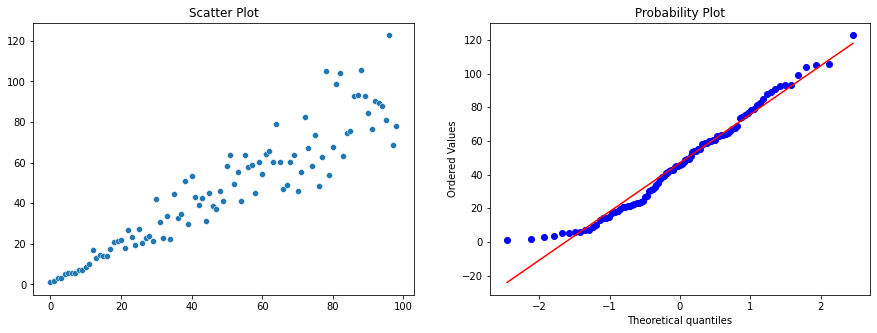

In [50]:
plt.figure(figsize=(15,5))

plt.subplot(1, 2, 1)
sns.scatterplot(data=y)
plt.title("Scatter Plot")

plt.subplot(1, 2, 2)
scipy.stats.probplot(y, dist="norm", plot=matplotlib.pyplot)

plt.show()

In [51]:
df = pd.DataFrame({'x': pd.Series(data=x), 'y': pd.Series(data=y)})

In [52]:
model_ols = smf.ols("x ~ y", data=df).fit() 

In [53]:
print(model_ols.summary())

                            OLS Regression Results                            
Dep. Variable:                      x   R-squared:                       0.872
Model:                            OLS   Adj. R-squared:                  0.871
Method:                 Least Squares   F-statistic:                     663.6
Date:                Tue, 25 May 2021   Prob (F-statistic):           3.62e-45
Time:                        12:34:38   Log-Likelihood:                -370.44
No. Observations:                  99   AIC:                             744.9
Df Residuals:                      97   BIC:                             750.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      6.3026      1.988      3.171      0.0

In [54]:
model_fitted_y = model_ols.fittedvalues
# model residuals
model_residuals = model_ols.resid
# normalized residuals
model_norm_residuals = model_ols.get_influence().resid_studentized_internal
# absolute residuals
model_abs_resid = np.abs(model_residuals)

c:\users\luisf\appdata\local\programs\python\python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


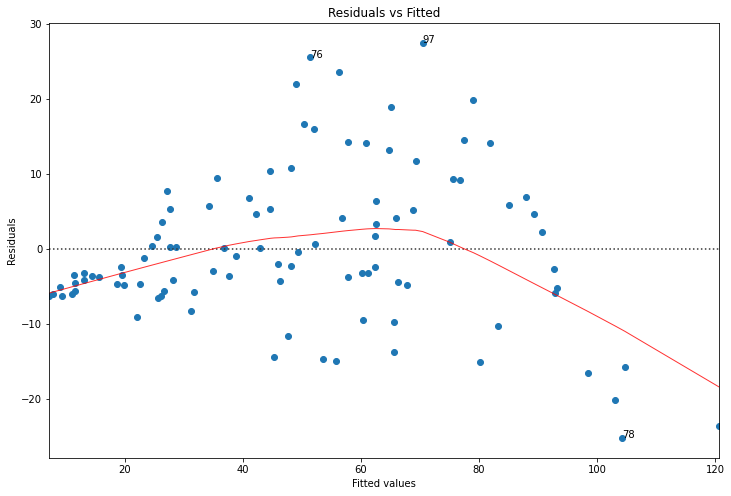

In [55]:
plot_lm_1 = plt.figure(1)
plot_lm_1.set_figheight(8)
plot_lm_1.set_figwidth(12)
plot_lm_1.axes[0] = sns.residplot(model_fitted_y, 'x', data=df, 
                          lowess=True, 
                          scatter_kws={'alpha': 1}, 
                          line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})
plot_lm_1.axes[0].set_title('Residuals vs Fitted')
plot_lm_1.axes[0].set_xlabel('Fitted values')
plot_lm_1.axes[0].set_ylabel('Residuals')

# annotations
abs_resid = model_abs_resid.sort_values(ascending=False)
abs_resid_top_3 = abs_resid[:3]
for i in abs_resid_top_3.index:
    plot_lm_1.axes[0].annotate(i, 
                               xy=(model_fitted_y[i], 
                                   model_residuals[i]));

In [56]:
df["weight_1"] = model_fitted_y

In [57]:
df["weight_1"] = df["weight_1"]**-1

In [58]:
import statsmodels.api as sm

In [59]:
model_wls_1 = sm.WLS(y, x, df['weight_1'])

In [60]:
mod_res_1 = model_wls_1.fit() 

In [61]:
print(mod_res_1.summary())

                                 WLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.965
Model:                            WLS   Adj. R-squared (uncentered):              0.965
Method:                 Least Squares   F-statistic:                              2725.
Date:                Tue, 25 May 2021   Prob (F-statistic):                    2.51e-73
Time:                        12:34:43   Log-Likelihood:                         -346.47
No. Observations:                  99   AIC:                                      694.9
Df Residuals:                      98   BIC:                                      697.5
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [62]:
df["temp"] = model_abs_resid 

In [63]:
model_temp = smf.ols("temp ~ y", data=df).fit()

In [64]:
weight_2 = model_temp.fittedvalues

In [65]:
weight_2 = weight_2**-2 

In [66]:
df['weight_2'] = weight_2 

In [67]:
mod_wls = sm.WLS(y,x, df['weight_2'])

In [68]:
mod_res = mod_wls.fit()

In [69]:
mod_res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 WLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.966
Model:                            WLS   Adj. R-squared (uncentered):              0.965
Method:                 Least Squares   F-statistic:                              2751.
Date:                Tue, 25 May 2021   Prob (F-statistic):                    1.60e-73
Time:                        12:34:48   Log-Likelihood:                         -341.68
No. Observations:                  99   AIC:                                      685.4
Df Residuals:                      98   BIC:                                      688.0
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.8969      0.017     52.447      0.000       0.863       0.931
==============================================================================
Omnibus:                        0.074   Durbin-Watson:                   2.128
Prob(Omnibus):                  0.964   Jarque-Bera (JB):                0.042
Skew:                          -0.042   Prob(JB):                        0.979
Kurtosis:                       2.946   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""